### IT is a binaryb classification problem (Yes/No) and we are using Random Forrest Classifier

### Workflow

#### Data Collection
#### EDA
#### Data Preprocessing
#### Train_Test_Split
#### Random_Forest_Classifier
#### Hyperparameter Tuning
#### Unknown Data
#### Train Model
#### Prediction

In [ ]:
IMPORT libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pickle


In [ ]:
## Data Collection and Processing

In [5]:
#loading the datasset

data=pd.read_csv("Rainfall.csv")
data

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.shape

(366, 12)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [8]:
data.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [10]:
#remove all extraspaces on columns
data.columns=data.columns.str.strip()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [13]:
#delete columns
data=data.drop(columns='day')

In [14]:
data.head(3)

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2


In [22]:
#checking the missing values
data.isnull().sum()


pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [27]:
#handle missing values
data["winddirection"]=data["winddirection"].fillna(data["winddirection"].mode()[0])
data["windspeed"]=data["windspeed"].fillna(data["windspeed"].mean())
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [ ]:
#convert Yes/No to 0&1

In [31]:
data["rainfall"].unique()

array(['yes', 'no'], dtype=object)

In [35]:
data["rainfall"].replace('yes',1,inplace = True)
data["rainfall"].replace('no',0,inplace = True)


data.head(3)

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2


In [ ]:
Exploratory Data Analysis (EDA)

In [36]:
sns.set(style="whitegrid")

In [37]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.536986
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.055908
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [38]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

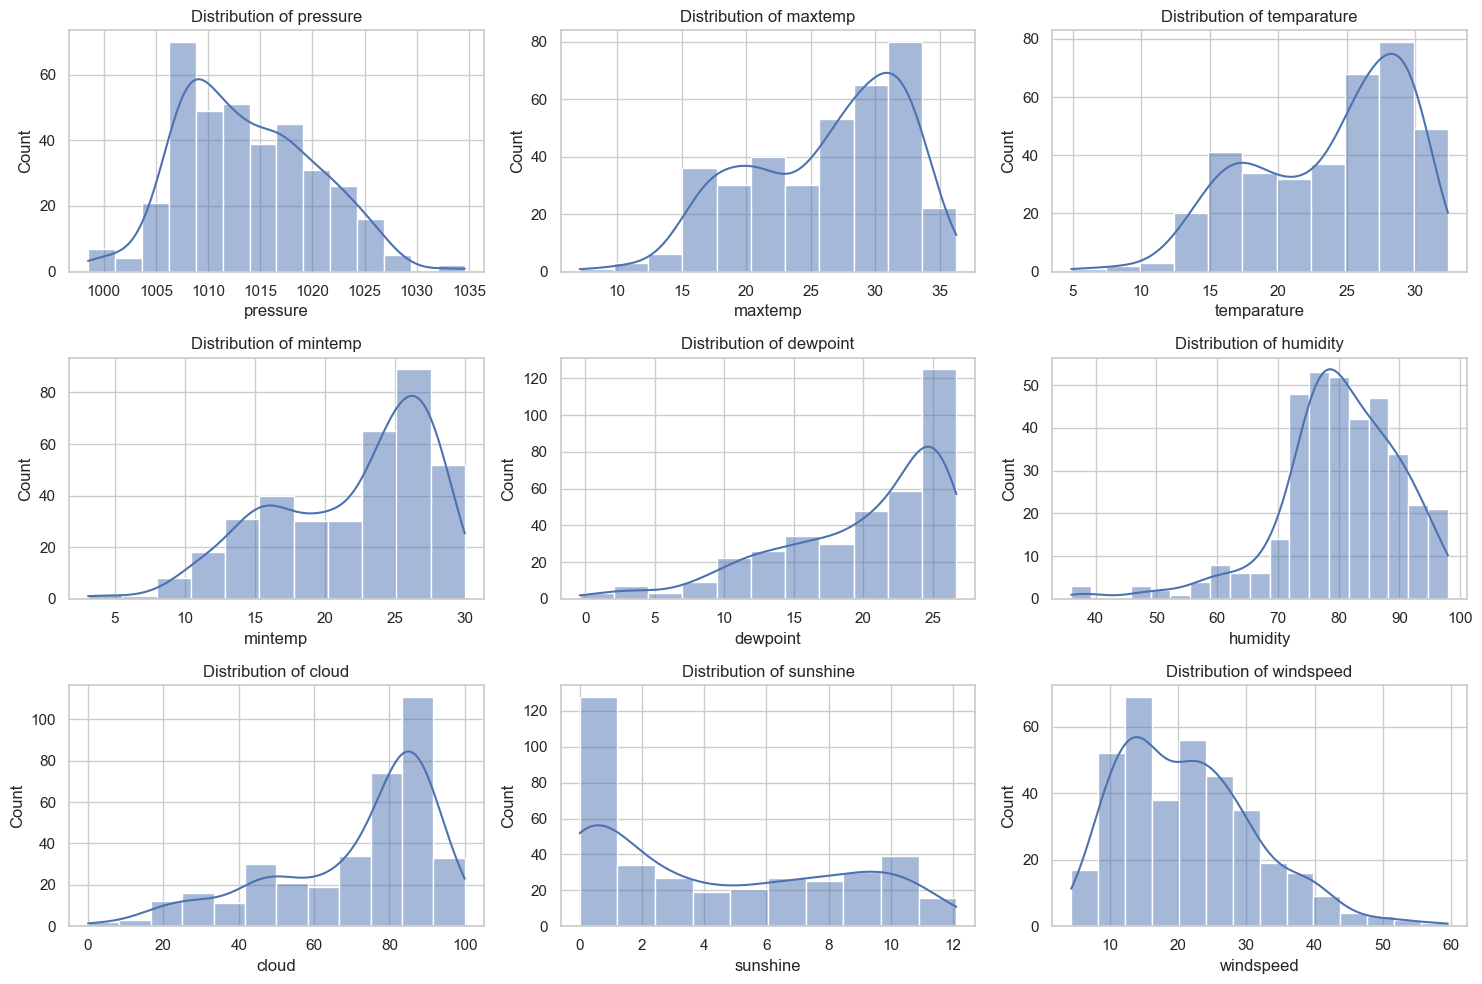

In [43]:
plt.figure(figsize=(15,10))

for i ,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud',  'sunshine',  'windspeed'],1):
        plt.subplot(3,3,i) 
        sns.histplot(data[column], kde =True)
        plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

#used to find the distribution of colums whether it is normal distribution or not

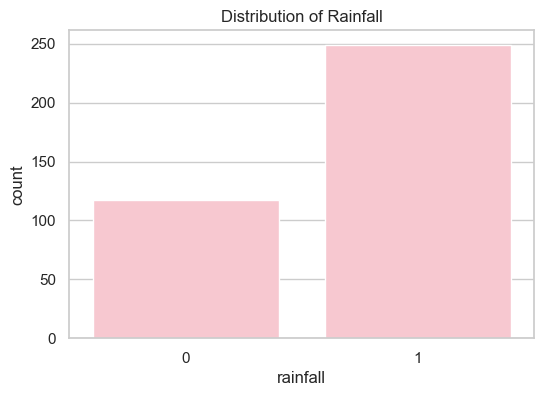

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(x="rainfall",data=data,color="pink")
plt.title("Distribution of Rainfall")
plt.show()

# used to find the distribution of variable whether it is balenced distribution or imbalence

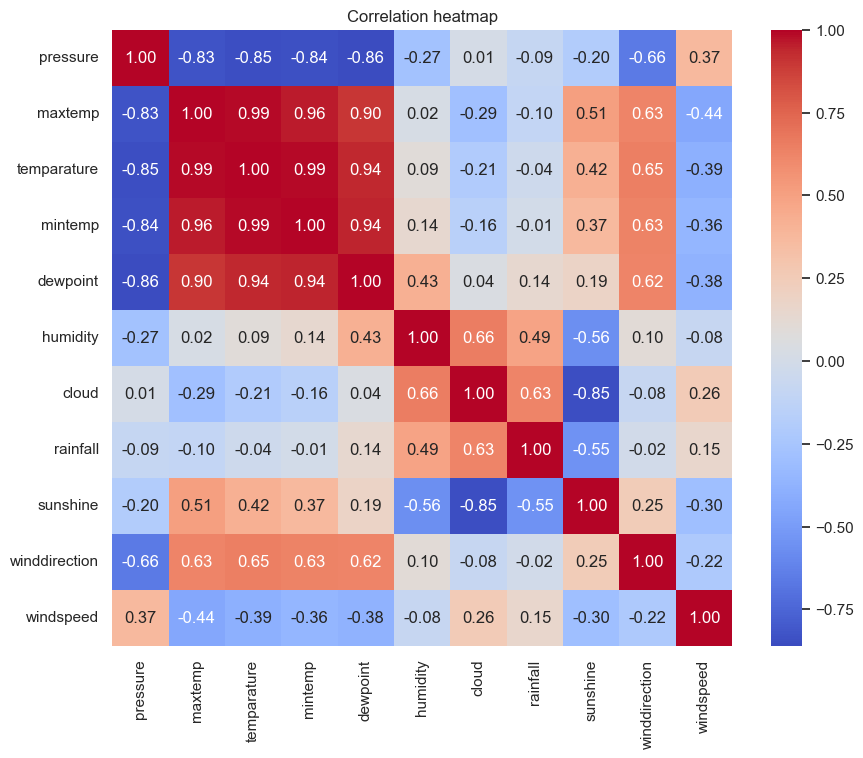

In [53]:
#coorelation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

#used to find the multicolinearity  that meance relationship of the columns are providese same 
#impact on data so we can reduuce the particibent columns to train the data

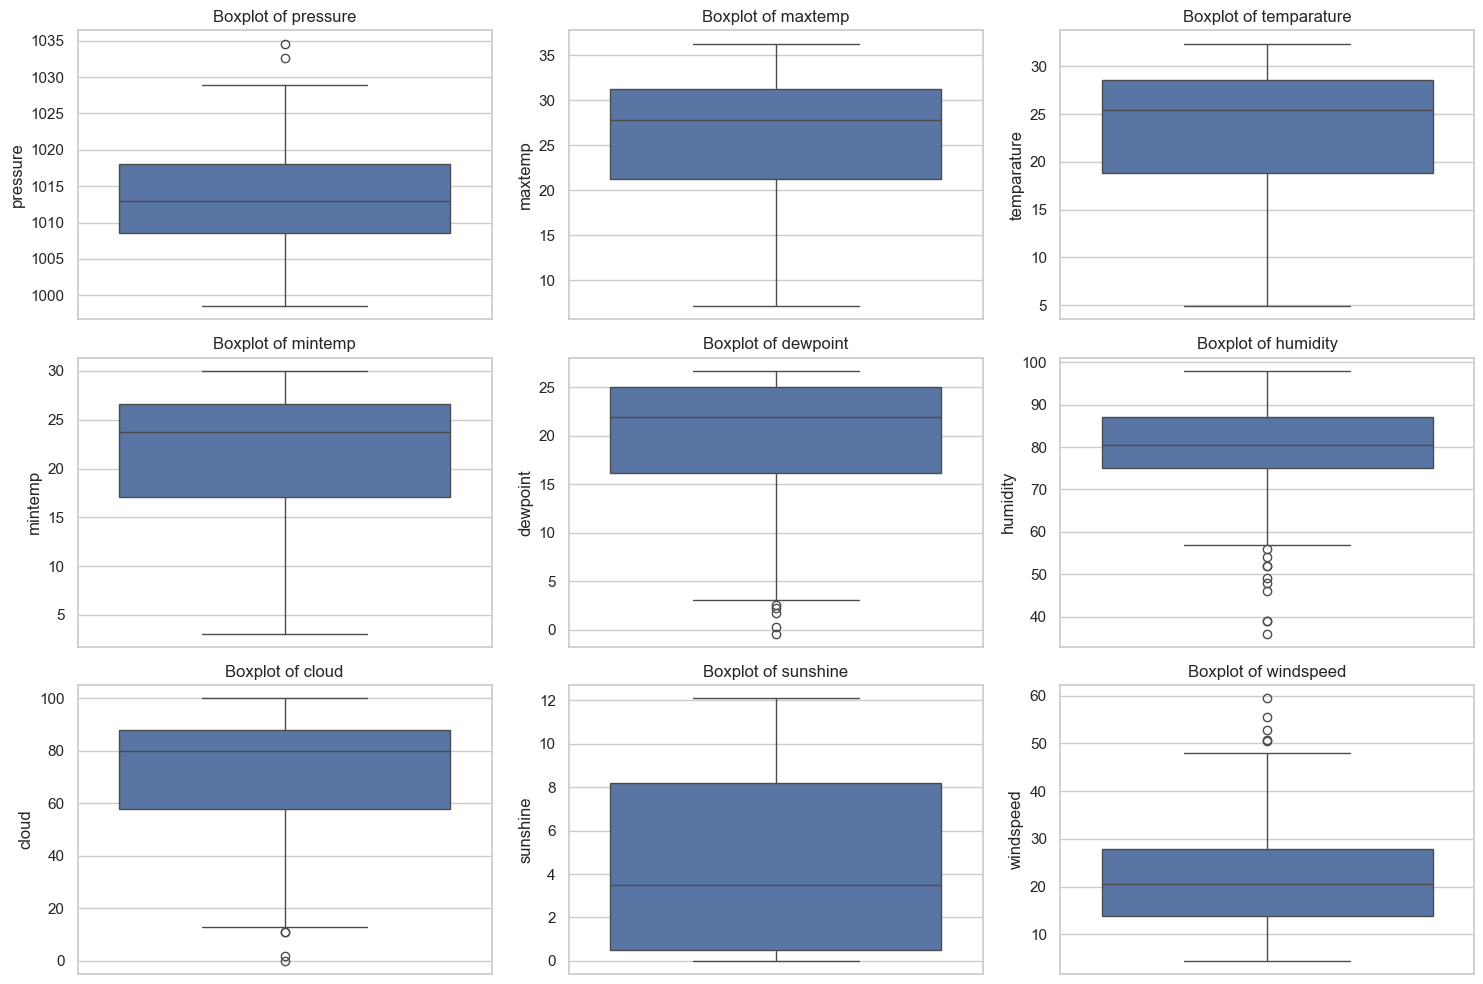

In [57]:
plt.figure(figsize=(15,10))

for i ,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud',  'sunshine',  'windspeed'],1):
        plt.subplot(3,3,i) 
        sns.boxplot(data[column])
        plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()



# Data Preprocessing 

In [62]:
#drop highly  correlarted columns
data=data.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [63]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [64]:
data["rainfall"].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [68]:
#seperate mejority and minority
df_majority=data[data["rainfall"]==1]
df_minority=data[data["rainfall"]==0]

In [69]:
df_majority

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...
359,1020.4,13.5,75,89,1,0.7,10.0,27.6
361,1022.7,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,13.3,75,78,1,4.6,70.0,33.4


In [70]:
df_minority

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
6,1021.8,15.0,79,56,0,3.4,30.0,21.5
7,1020.8,14.4,78,28,0,7.7,60.0,14.3
8,1020.6,14.3,78,79,0,3.3,70.0,39.3
11,1019.9,13.7,79,86,0,0.6,20.0,23.9
12,1020.8,12.1,77,34,0,9.1,30.0,24.4
...,...,...,...,...,...,...,...,...
351,1025.9,-0.4,39,25,0,9.1,20.0,35.6
352,1026.4,3.1,48,11,0,9.5,40.0,25.2
353,1025.4,8.7,62,71,0,2.1,30.0,29.0
360,1020.6,13.3,74,87,0,0.6,30.0,21.6


In [71]:
# downsample majority class to match minority count

df_majority_downsampled=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)
#resamplesize

In [76]:
print(df_majority_downsampled.shape)
print(df_minority.shape)

(117, 8)
(117, 8)


In [78]:
df_downsample=pd.concat([df_majority_downsampled,df_minority])

In [80]:
df_downsample.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [81]:
#shuffle the final dataframe
df_downsample=df_downsample.sample(frac=1,random_state=42).reset_index(drop=True)


In [82]:
df_downsample.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [84]:
df_downsample["rainfall"].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [85]:
#splitting the data into training data and test data

x=df_downsample.drop(columns="rainfall")
y=df_downsample["rainfall"]

In [86]:
x

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,0.0,30.0,28.5
1,1013.4,19.5,69,17,10.5,70.0,12.4
2,1006.1,24.4,74,27,10.8,220.0,8.7
3,1007.6,24.8,85,84,1.8,70.0,34.8
4,1021.2,8.4,66,18,10.1,20.0,24.4
...,...,...,...,...,...,...,...
229,1008.1,25.4,86,75,5.7,20.0,9.5
230,1010.1,19.9,91,89,0.0,70.0,31.8
231,1020.6,14.7,91,88,0.3,50.0,24.4
232,1008.3,24.1,74,29,5.7,10.0,4.4


In [87]:
y

0      1
1      0
2      0
3      1
4      0
      ..
229    1
230    1
231    1
232    0
233    1
Name: rainfall, Length: 234, dtype: int64

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [94]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(187, 7)
(47, 7)
(187,)
(47,)


# Model training

In [95]:
rf_model=RandomForestClassifier(random_state=42)

param_grid={
    "n_estimators":[50,100,200],   #num of tree
    "max_features":["sqrt", "log2"],
    "max_depth":[None,10,20,30],   #max branch
    "min_samples_split":[2,5,10],  
    "min_samples_leaf":[1,2,4]
}
                                

# Hyperparameter tuning

In [97]:
grid_search=GridSearchCV(estimator=rf_model,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)

#n_jobs=-1 all the process in parallaly exicuted

grid_search.fit(x_train,y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\samsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [101]:
best_model=grid_search.best_estimator_

print("best_model for random forest:",best_model)

best_model for random forest: RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=42)


# Model evaluation

In [103]:
cv_score=cross_val_score(best_model,x_train,y_train,cv=5)
print("Cross validation score:",cv_score)
print("Mean Cross validation score:",np.mean(cv_score))

Cross validation score: [0.68421053 0.84210526 0.83783784 0.83783784 0.91891892]
Mean Cross validation score: 0.8241820768136557


In [105]:
# For Test set Performance
y_pred=best_model.predict(x_test)

print("Test set Accuracy:",accuracy_score(y_test,y_pred))
print("Test set Confusion Matrix:",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))


Test set Accuracy: 0.7446808510638298
Test set Confusion Matrix: [[17  7]
 [ 5 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



# Prediction on unknown data

In [123]:
input_data=(1015.9,19.9,95,81,0.0,40.0,13.7)
input_df=pd.DataFrame([input_data],columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'])

In [124]:
input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [126]:
prediction=best_model.predict(input_df)

print("prediction result:","Rainfall" if prediction[0] == 1 else "No Rainfall")

prediction result: Rainfall


# pickling

In [128]:
#Sacve model and Feature names to apickle file
model_data={"model" : best_model, "feature nmames" : x.columns.tolist()}

with open("Rainfall model.pkl","wb") as file:
    pickle.dump(model_data,file)

In [ ]:
import pickle
import pandas as pd

In [129]:
#Load the trained model and feature names freom the pickle file

with open("Rainfall model.pkl","rb") as file:
    modeldata=pickle.load(file)

In [132]:
modeldata

{'model': RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=42),
 'feature nmames': ['pressure',
  'dewpoint',
  'humidity',
  'cloud',
  'sunshine',
  'winddirection',
  'windspeed']}

In [135]:
#unpacking
model=modeldata["model"]
feature_names=modeldata["feature nmames"]

In [139]:
input_data=(1015.9,19.9,95,81,0.0,40.0,13.7)
input_df=pd.DataFrame([input_data],columns=feature_names)

In [140]:
input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [142]:
model.predict(input_df)
prediction=best_model.predict(input_df)
print("prediction result:","Rainfall" if prediction[0] == 1 else "No Rainfall")

prediction result: Rainfall


In [ ]:
# ANOTHER METHODS
#SMOTE TECHNIQUE IS INCREASE THE MINORITY SAMPLES INSTEAD OF REDUCE THE MEJORITY SAMPLE
#PCA FOR DIMENTIONALITY REDUCTION
#FEATURE SCLALING
#DIFFERNT HYPERPARAMETER TUNE